**Begin Data Prep**

In [ ]:
from traderRNN import StockTraderRNN as STRNN
import numpy as np
import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

Traceback (most recent call last):
  File "c:\Users\higgj\.vscode\extensions\ms-python.python-2024.20.0-win32-x64\python_files\python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'traderRNN'



In [2]:
df_all = pd.read_csv('data/AMZN/aggregate/AMZN_agg.csv')
df_all.sort_values(by='Unix', ascending=False, inplace=True)
print("COLUMNS: \n  ", list(df_all.columns), "\n\n")
print("Time span of available data: \n  ", df_all['Timestamp'].iloc[0], " to ", df_all['Timestamp'].iloc[-1])

COLUMNS: 
   ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Unix'] 


Time span of available data: 
   2024-08-16 23:59:00  to  2023-08-16 10:05:00


In [3]:
# Get training data
train_df = df_all.iloc[:int(len(df_all) * 0.75)] # 75% of data for training
test_df = df_all.iloc[int(len(df_all) * 0.75):] # 25% of data for testing

print("COLUMNS: \n  ", train_df.columns, "\n\n")
print("TRAINING DATA")
print("     Length of training data:", len(train_df))
print("     Time span of training data:", train_df['Timestamp'].iloc[0], " to ", train_df['Timestamp'].iloc[-1], "\n\n")
print("TESTING DATA")
print("     Length of testing data:", len(test_df))
print("     Time span of testing data:", test_df['Timestamp'].iloc[0], " to ", test_df['Timestamp'].iloc[-1])

COLUMNS: 
   Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Unix'], dtype='object') 


TRAINING DATA
     Length of training data: 183602
     Time span of training data: 2024-08-16 23:59:00  to  2023-11-16 21:10:00 


TESTING DATA
     Length of testing data: 61201
     Time span of testing data: 2023-11-16 21:09:00  to  2023-08-16 10:05:00


**Begin Trader creation**


* __Constructor__: Sets default values for key parameters, such as window_size, epochs, and batch_size, which are essential to the RNN training process. Initializes a MinMax scaler and an untrained model.

* __Preprocess Data (preprocess_data)__: Scales data and generates sequences based on window_size. It labels data as 'Buy', 'Sell', or 'Hold' based on specific conditions.

* __Model Creation (create_model)__: Configures the RNN model structure using LSTM layers and dropout layers. It allows customization through parameters such as the number of LSTM units, dense units, optimizer, and loss function, making it adaptable to various settings.

* __Train (train)__: Prepares the data, initializes the model, and trains it with the specified features (X) and labels (y), or it preprocesses the data if not provided.

* __Prediction (make_prediction)__: Predicts actions on recent data, returning a 'Buy', 'Sell', or 'Hold' decision based on the highest probability.

* __Plot Predictions (plot_price_predictions)__: Compares and plots actual vs. predicted actions to visually assess model accuracy.

* __Evaluate (evaluate)__: Tests the model on test data and returns accuracy to measure performance.

* __Save Model (save_model)__: Saves the trained model to a specified path for future use.

In [4]:
# Initialize model
trader = STRNN(name='amzn_01', window_size=86400, epochs=3, batch_size=64) # TODO: Change window size to something longer

In [ ]:
# Preprocess data
feature_list = ['Open','High','Low','Close','Volume'] #TODO: add/test features 
X_train, y_train = trader.preprocess_data(df=train_df, features=feature_list)

In [6]:
# Train model
trader.train(train_df, X_train, y_train)

C:\Users\higgj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 68s 23ms/step - accuracy: 0.9992 - loss: 0.0211
Epoch 2/3
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 62s 22ms/step - accuracy: 0.9995 - loss: 0.0049
Epoch 3/3
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 63s 22ms/step - accuracy: 0.9996 - loss: 0.0042


In [7]:
# Test model
X_test, y_test = trader.preprocess_data(df=test_df, features=feature_list) 
accuracy = trader.evaluate(X_test, y_test)
print("Model Accuracy:", accuracy)

1911/1911 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9995 - loss: 0.0044
Model Accuracy: 0.9995747804641724


1911/1911 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step


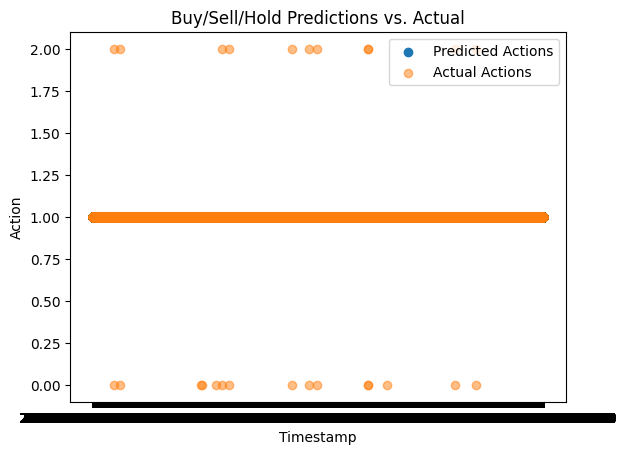

In [8]:
# Plot results
trader.plot_price_predictions(test_df, X_test, y_test)

In [9]:
# Save model (optional)
trader.save_model('models/')